# Notebook - Análise Vitórias League of Legends


Trabalho Prático - Introdução à Ciência de dados
Universidade Federal de Minas Gerais

Participantes: Alessandro Mesa Teppa, Bruno Buti Ferreira Guilherme, Lucas Affonso Pires, Ricardo Shen, Mateus Faria Zaparoli Monteiro


Este nootebook tem por finalidade analisar o banco de dados https://www.kaggle.com/datasets/paololol/league-of-legends-ranked-matches a fim de explorar possíveis correlações entre objetivos dentro do jogo e
a vitória da partida.

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import requests
import seaborn as sns
import io

Importação do banco de dados

In [4]:
df_champs = pd.read_csv('https://drive.google.com/uc?id=1P1OrzWWvwA_g0Mg0ZT9mQL6GW8wSJta4')
df_matches = pd.read_csv('https://drive.google.com/uc?id=1nVgXQnMDGGOWAVbdI-jMhR51fEmLO0--')
df_participants = pd.read_csv('https://drive.google.com/uc?id=10LtjP-XsGbJOvbRWV1Oo8ZqCoO1s9Kmq')
df_teamstats = pd.read_csv('https://drive.google.com/uc?id=1PkIOv0DDsRUwPvoKwbad5QVQB7TAaLgd')
df_teambans = pd.read_csv('https://drive.google.com/uc?id=1-ftxNJx2tUA2dHFuPBtNsrAULDo7ePN-')

In [5]:
# !pip install mega.py

In [6]:
# from mega import Mega

# mega = Mega()
# url = "https://mega.nz/file/7R5glD5B#ff0YvYa3VXxJcxQgZFLOeYOaFQ8SnmGwO-b2Ft8TFME"

# file_stats1 = mega.download_url(url)
# print("Arquivo baixado:", file_stats1)


In [7]:
df_stats1 = pd.read_csv('stats1.csv')
df_stats1.head()

,id,win,item1,item2,item3,item4,item5,item6,trinket,kills,...,neutralminionskilled,ownjunglekills,enemyjunglekills,totcctimedealt,champlvl,pinksbought,wardsbought,wardsplaced,wardskilled,firstblood
0,9,0,3748,2003,3111,3053,1419,1042,3340,6,...,69,42,27,610,13,0,0,10,0,0
1,10,0,2301,3111,3190,3107,0,0,3364,0,...,1,1,0,211,14,1,0,17,3,0
2,11,0,1055,3072,3006,3031,3046,1036,3340,7,...,3,1,2,182,14,1,0,13,5,0
3,12,0,1029,3078,3156,1001,3053,0,3340,5,...,6,6,0,106,15,0,0,3,0,0
4,13,0,3020,1058,3198,3102,1052,1026,3340,2,...,4,3,1,159,15,0,0,10,0,0


In [8]:
# mega = Mega()
# url = "https://mega.nz/file/3YQwgSRT#LL35rwhjKfu8QdMA4iIMb6_pPGJeqDSEP_UOgSf9tzI"

# file_stats2 = mega.download_url(url)
# print("Arquivo baixado:", file_stats2)

In [9]:
df_stats2 = pd.read_csv('stats2.csv', low_memory=False)
df_stats2.head()

,id,win,item1,item2,item3,item4,item5,item6,trinket,kills,...,neutralminionskilled,ownjunglekills,enemyjunglekills,totcctimedealt,champlvl,pinksbought,wardsbought,wardsplaced,wardskilled,firstblood
0,1028382,0,1056,3001,1052,3020,1058,1026,3340,7,...,0,0,0,50,12,0,0,6,0,0
1,1028383,0,1041,2003,0,0,0,0,3340,0,...,11,11,0,114,3,0,0,0,0,0
2,1028384,0,1036,2010,0,0,0,0,3340,0,...,0,0,0,0,1,0,0,0,0,0
3,1028385,0,1055,2010,0,0,0,0,3340,0,...,0,0,0,0,2,0,0,0,0,0
4,1028386,0,2033,0,0,0,0,0,3340,0,...,0,0,0,0,3,0,0,0,0,0


In [10]:
df_champs.head(10)

,name,id
0,Jax,24
1,Sona,37
2,Tristana,18
3,Varus,110
4,Fiora,114
5,Singed,27
6,Tahm Kench,223
7,LeBlanc,7
8,Thresh,412
9,Karma,43


In [11]:
df_matches.head()

,id,gameid,platformid,queueid,seasonid,duration,creation,version
0,10,3187427022,EUW1,420,8,1909,1495068946860,7.10.187.9675
1,11,3187425281,EUW1,420,8,1693,1495066760778,7.10.187.9675
2,12,3187269801,EUW1,420,8,1482,1495053375889,7.10.187.9675
3,13,3187252065,EUW1,420,8,1954,1495050993613,7.10.187.9675
4,14,3187201038,EUW1,420,8,2067,1495047893400,7.10.187.9675


In [12]:
df_participants.head()

,id,matchid,player,championid,ss1,ss2,role,position
0,9,10,1,19,4,11,NONE,JUNGLE
1,10,10,2,267,3,4,DUO_SUPPORT,BOT
2,11,10,3,119,7,4,DUO_CARRY,BOT
3,12,10,4,114,12,4,SOLO,TOP
4,13,10,5,112,4,3,SOLO,MID


In [13]:
df_stats1.head()

,id,win,item1,item2,item3,item4,item5,item6,trinket,kills,...,neutralminionskilled,ownjunglekills,enemyjunglekills,totcctimedealt,champlvl,pinksbought,wardsbought,wardsplaced,wardskilled,firstblood
0,9,0,3748,2003,3111,3053,1419,1042,3340,6,...,69,42,27,610,13,0,0,10,0,0
1,10,0,2301,3111,3190,3107,0,0,3364,0,...,1,1,0,211,14,1,0,17,3,0
2,11,0,1055,3072,3006,3031,3046,1036,3340,7,...,3,1,2,182,14,1,0,13,5,0
3,12,0,1029,3078,3156,1001,3053,0,3340,5,...,6,6,0,106,15,0,0,3,0,0
4,13,0,3020,1058,3198,3102,1052,1026,3340,2,...,4,3,1,159,15,0,0,10,0,0


In [14]:
df_stats2.head()

,id,win,item1,item2,item3,item4,item5,item6,trinket,kills,...,neutralminionskilled,ownjunglekills,enemyjunglekills,totcctimedealt,champlvl,pinksbought,wardsbought,wardsplaced,wardskilled,firstblood
0,1028382,0,1056,3001,1052,3020,1058,1026,3340,7,...,0,0,0,50,12,0,0,6,0,0
1,1028383,0,1041,2003,0,0,0,0,3340,0,...,11,11,0,114,3,0,0,0,0,0
2,1028384,0,1036,2010,0,0,0,0,3340,0,...,0,0,0,0,1,0,0,0,0,0
3,1028385,0,1055,2010,0,0,0,0,3340,0,...,0,0,0,0,2,0,0,0,0,0
4,1028386,0,2033,0,0,0,0,0,3340,0,...,0,0,0,0,3,0,0,0,0,0


In [15]:
df_teamstats.head()

,matchid,teamid,firstblood,firsttower,firstinhib,firstbaron,firstdragon,firstharry,towerkills,inhibkills,baronkills,dragonkills,harrykills
0,10,100,0,1,0,0,0,0,5,0,0,0,0
1,10,200,1,0,1,1,1,1,10,3,1,3,1
2,11,100,1,0,0,0,0,0,2,0,0,0,0
3,11,200,0,1,1,0,1,0,10,3,0,2,0
4,12,100,1,0,0,0,0,0,1,0,0,0,0


In [16]:
df_teambans.head()

,matchid,teamid,championid,banturn
0,10,100,11,1
1,10,100,117,3
2,10,100,120,5
3,10,200,84,2
4,10,200,201,4


In [17]:
df_teamstats.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 368138 entries, 0 to 368137
Data columns (total 13 columns):
 #   Column       Non-Null Count   Dtype
---  ------       --------------   -----
 0   matchid      368138 non-null  int64
 1   teamid       368138 non-null  int64
 2   firstblood   368138 non-null  int64
 3   firsttower   368138 non-null  int64
 4   firstinhib   368138 non-null  int64
 5   firstbaron   368138 non-null  int64
 6   firstdragon  368138 non-null  int64
 7   firstharry   368138 non-null  int64
 8   towerkills   368138 non-null  int64
 9   inhibkills   368138 non-null  int64
 10  baronkills   368138 non-null  int64
 11  dragonkills  368138 non-null  int64
 12  harrykills   368138 non-null  int64
dtypes: int64(13)
memory usage: 36.5 MB


In [18]:
df_teamstats.describe()

,matchid,teamid,firstblood,firsttower,firstinhib,firstbaron,firstdragon,firstharry,towerkills,inhibkills,baronkills,dragonkills,harrykills
count,368138.000000,368138.000000,368138.000000,368138.000000,368138.000000,368138.000000,368138.000000,368138.000000,368138.000000,368138.000000,368138.000000,368138.000000,368138.000000
mean,95052.748632,150.000000,0.494613,0.486942,0.456169,0.318120,0.477125,0.227032,5.751197,1.036978,0.413486,1.437252,0.227537
std,53591.840798,50.000068,0.499972,0.499830,0.498076,0.465747,0.499477,0.418914,3.860772,1.262569,0.607862,1.238456,0.420200
min,10.000000,100.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48782.000000,100.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
50%,95068.000000,150.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,1.000000,0.000000,1.000000,0.000000
75%,141563.000000,200.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,9.000000,2.000000,1.000000,2.000000,0.000000
max,187588.000000,200.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,16.000000,13.000000,5.000000,7.000000,2.000000


<Figure size 1200x600 with 0 Axes>

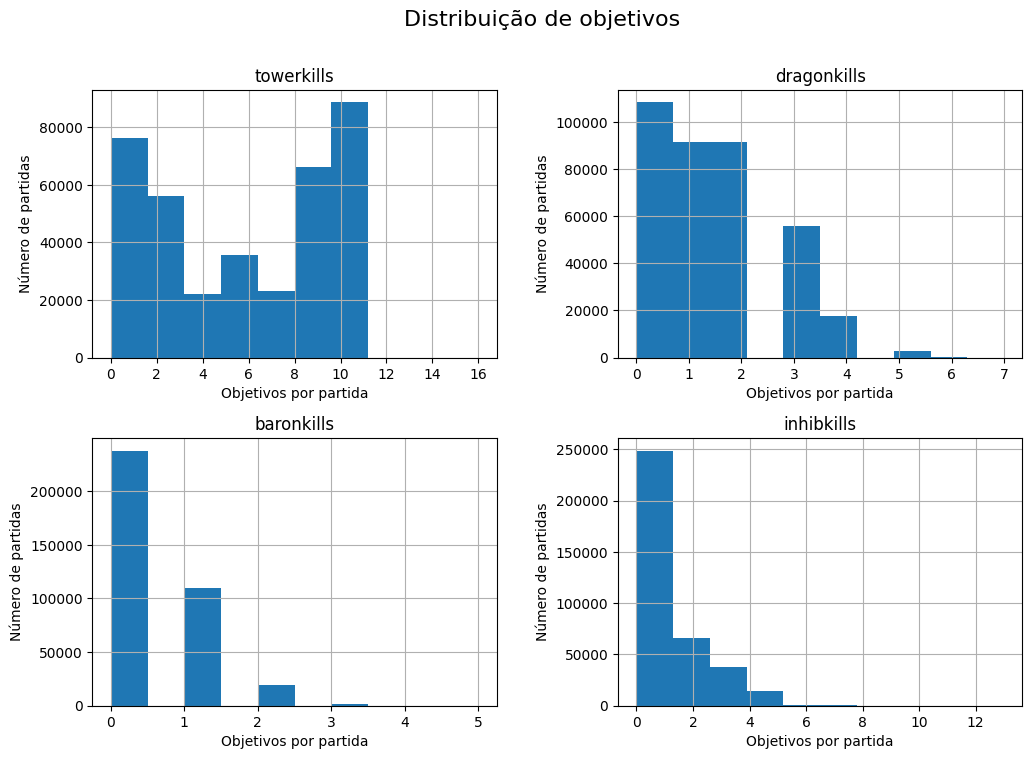

In [19]:
# Distribuição de objetivos
plt.figure(figsize=(12, 6))
df_teamstats[['towerkills', 'dragonkills', 'baronkills', 'inhibkills']].hist(bins=10, figsize=(12, 8))
for grafico in plt.gcf().get_axes():
    grafico.set_xlabel('Objetivos por partida')
    grafico.set_ylabel('Número de partidas')

plt.suptitle('Distribuição de objetivos', fontsize=16)
plt.show()

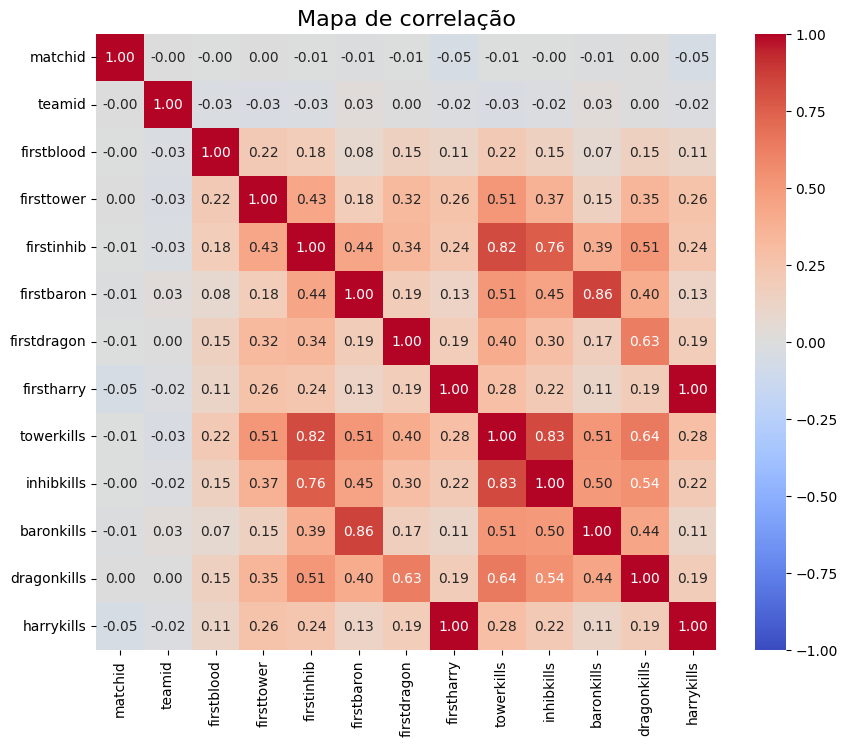

In [20]:
# Matriz de correlação
correlation_matrix = df_teamstats.corr()

# Visualização do mapa de calor
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', vmin=-1, vmax=1)
plt.title('Mapa de correlação', fontsize=16)
plt.show()


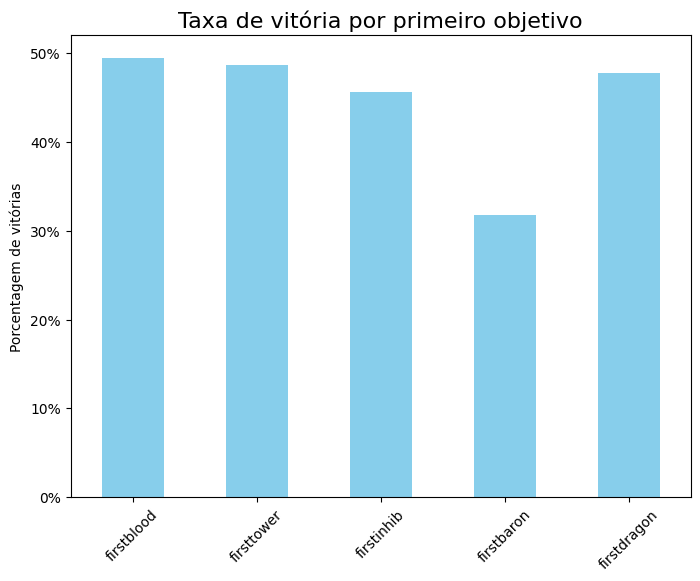

In [21]:
# Calcula a taxa de vitória baseada baseada no primeiro objetivo
first_objectives = ['firstblood', 'firsttower', 'firstinhib', 'firstbaron', 'firstdragon']
win_rates = df_teamstats[first_objectives].mean()

# Barplot das taxas de vitória
win_rates.plot(kind='bar', color='skyblue', figsize=(8, 6))
plt.title('Taxa de vitória por primeiro objetivo', fontsize=16)
plt.ylabel('Porcentagem de vitórias')
plt.xticks(rotation=45)
yticks = plt.gca().get_yticks()
plt.gca().set_yticks(yticks)
plt.gca().set_yticklabels([f'{int(y * 100)}%' for y in yticks])
plt.ylim(0, 0.52)
plt.show()


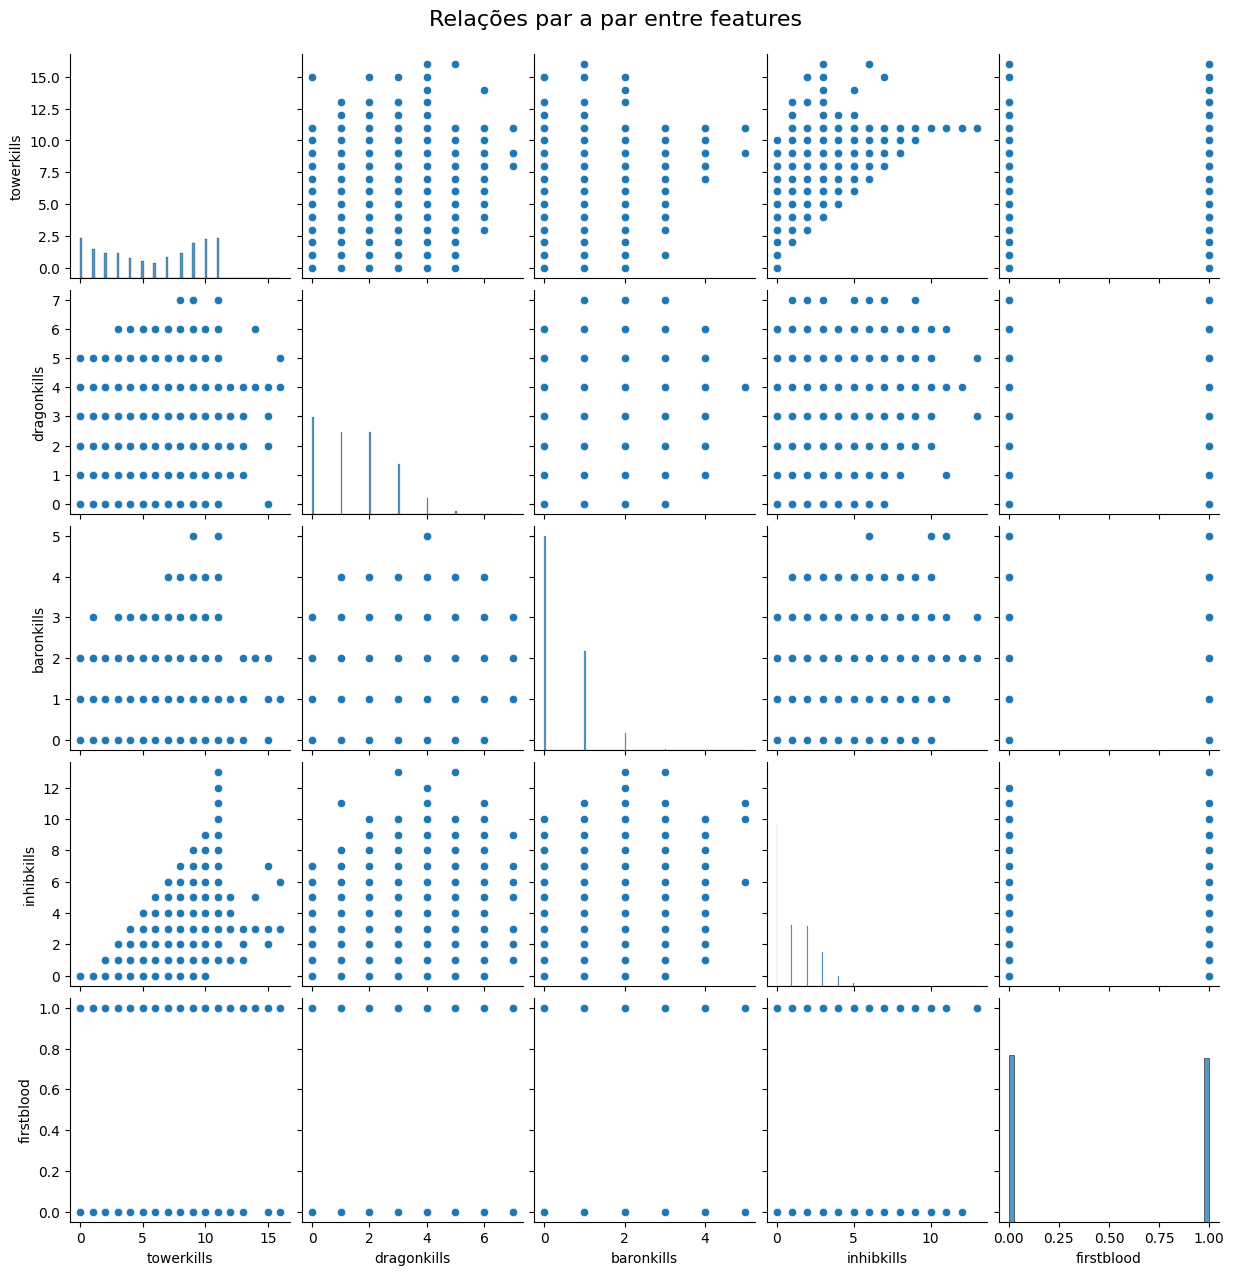

In [22]:
# Pairplot para features chave do dataset
sns.pairplot(df_teamstats[['towerkills', 'dragonkills', 'baronkills', 'inhibkills', 'firstblood']])
plt.suptitle('Relações par a par entre features', fontsize=16, y=1.02)
plt.show()


In [23]:
# Calcular a correlação de Pearson
correlacao_pearson = df_stats1["kills"].corr(df_stats1["win"], method="pearson")

# Calcular a correlação de Spearman
correlacao_spearman = df_stats1["kills"].corr(df_stats1["win"], method="spearman")

print("Correlação de Pearson:", correlacao_pearson)
print("Correlação de Spearman:", correlacao_spearman)

Correlação de Pearson: 0.25982587045689676
Correlação de Spearman: 0.2625017699696558


In [24]:
media_kills = df_stats1.groupby("win")["kills"].mean()

print("Média de kills por resultado:")
print(media_kills)

Média de kills por resultado:
win
0    4.551621
1    6.918076
Name: kills, dtype: float64


In [25]:
from scipy.stats import ttest_ind

kills_vencedores = df_stats1[df_stats1["win"] == 1]["kills"]
kills_perdedores = df_stats1[df_stats1["win"] == 0]["kills"]

# Teste T
t_stat, p_val = ttest_ind(kills_vencedores, kills_perdedores, equal_var=False)
print(f"Estatística T: {t_stat}, Valor P: {p_val}")

Estatística T: 269.06649474974404, Valor P: 0.0


In [26]:
import numpy as np
from scipy.stats import norm

def sigmoide(z):
    return 1 / (1 + np.exp(-z))

def log_verossimilhanca(X, y, beta):
    z = np.dot(X, beta)
    ll = np.sum(y * np.log(sigmoide(z)) + (1 - y) * np.log(1 - sigmoide(z)))
    return ll

def gradiente(X, y, beta):
    z = np.dot(X, beta)
    erro = sigmoide(z) - y
    grad = np.dot(X.T, erro)
    return grad

def calcular_erros_padroes(X, beta):
    z = np.dot(X, beta)
    p = sigmoide(z)
    W = np.diag(p * (1 - p))
    matriz_cov = np.linalg.inv(np.dot(X.T, np.dot(W, X)))
    erros_padroes = np.sqrt(np.diag(matriz_cov))
    return erros_padroes

def regressao_logistica(X, y, lr=0.01, epocas=1000):
    beta = np.zeros(X.shape[1])
    for epoca in range(epocas):
        grad = gradiente(X, y, beta)
        beta -= lr * grad

    return beta

def resumo_modelo(X, y, beta):
    erros_padroes = calcular_erros_padroes(X, beta)
    z_scores = beta / erros_padroes
    p_valores = 2 * (1 - norm.cdf(np.abs(z_scores)))
    ll = log_verossimilhanca(X, y, beta)
    ll_nulo = log_verossimilhanca(X, y, np.zeros(X.shape[1]))

    print(f"Log-Verossimilhança: {ll:.4f}")
    print()
    print(f"{'Variável':<15}{'Coef':>10}{'Erro Padrão':>15}{'z':>10}{'P>|z|':>10}")
    for i, coef in enumerate(beta):
        print(f"{'Intercepto' if i == 0 else f'X{i}':<15}{coef:>10.4f}{erros_padroes[i]:>15.4f}{z_scores[i]:>10.4f}{p_valores[i]:>10.4f}")

# Modelo de Regressão Logística
X = df_stats1["kills"].values
y = df_stats1["win"].values
X = np.c_[np.ones(X.shape[0]), X]
beta = regressao_logistica(X, y)

# resumo_modelo(X, y, beta)


C:\Users\User\AppData\Local\Temp\ipykernel_21364\2039091548.py:5: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))


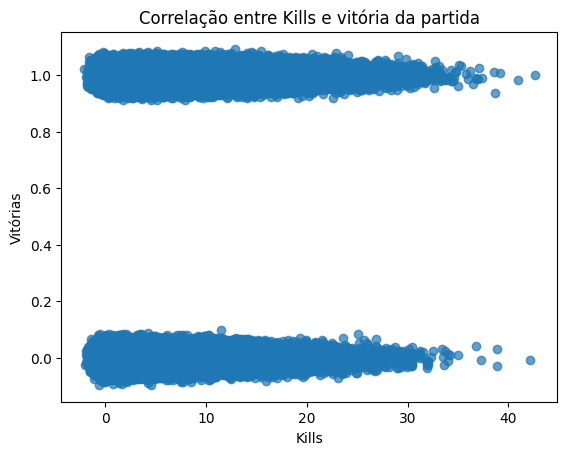

In [27]:
noise_x = np.random.normal(loc=0, scale=0.5, size=len(df_stats1["kills"]))
noise_y = np.random.normal(loc=0, scale=0.02, size=len(df_stats1["win"]))

plt.scatter(df_stats1["kills"] + noise_x, df_stats1["win"] + noise_y, alpha=0.7)
plt.xlabel("Kills")
plt.ylabel("Vitórias")
plt.title("Correlação entre Kills e vitória da partida")
plt.show()

In [28]:
df_participants['teamid'] =  (df_participants.index // 5 % 2).map({0: 100,1:200})
df_teamstats_participants = pd.merge(df_teamstats, df_participants, on=['matchid', 'teamid'], how='inner') #teamstats, participantes (matechid - teamstats, participantes), stats1, stats2 (id - participantes e stats1 e 2)
df_ts_p_s1 = pd.merge(df_teamstats_participants, df_stats1, on='id', how='inner')
df_ts_p_s2 = pd.merge(df_teamstats_participants, df_stats2, on='id', how='inner')
df_merged = pd.concat([df_ts_p_s1, df_ts_p_s2], ignore_index=True)
df_merged2 = pd.merge(df_merged, df_matches, left_on='matchid', right_on='id', how='inner')
# print(df_merged.columns.tolist)

In [29]:
df_merged2.head(50)

,matchid,teamid,firstblood_x,firsttower,firstinhib,firstbaron,firstdragon,firstharry,towerkills,inhibkills_x,...,wardskilled,firstblood_y,id_y,gameid,platformid,queueid,seasonid,duration,creation,version
0,10,100,0,1,0,0,0,0,5,0,...,0,0,10,3187427022,EUW1,420,8,1909,1495068946860,7.10.187.9675
1,10,100,0,1,0,0,0,0,5,0,...,3,0,10,3187427022,EUW1,420,8,1909,1495068946860,7.10.187.9675
2,10,100,0,1,0,0,0,0,5,0,...,5,0,10,3187427022,EUW1,420,8,1909,1495068946860,7.10.187.9675
3,10,100,0,1,0,0,0,0,5,0,...,0,0,10,3187427022,EUW1,420,8,1909,1495068946860,7.10.187.9675
4,10,100,0,1,0,0,0,0,5,0,...,0,0,10,3187427022,EUW1,420,8,1909,1495068946860,7.10.187.9675
5,10,200,1,0,1,1,1,1,10,3,...,2,0,10,3187427022,EUW1,420,8,1909,1495068946860,7.10.187.9675
6,10,200,1,0,1,1,1,1,10,3,...,0,0,10,3187427022,EUW1,420,8,1909,1495068946860,7.10.187.9675
7,10,200,1,0,1,1,1,1,10,3,...,0,0,10,3187427022,EUW1,420,8,1909,1495068946860,7.10.187.9675
8,10,200,1,0,1,1,1,1,10,3,...,1,1,10,3187427022,EUW1,420,8,1909,1495068946860,7.10.187.9675
9,10,200,1,0,1,1,1,1,10,3,...,7,0,10,3187427022,EUW1,420,8,1909,1495068946860,7.10.187.9675


In [30]:
from sklearn.linear_model import LinearRegression

In [31]:
print(df_merged2.columns.tolist)

<bound method IndexOpsMixin.tolist of Index(['matchid', 'teamid', 'firstblood_x', 'firsttower', 'firstinhib',
       'firstbaron', 'firstdragon', 'firstharry', 'towerkills', 'inhibkills_x',
       'baronkills', 'dragonkills', 'harrykills', 'id_x', 'player',
       'championid', 'ss1', 'ss2', 'role', 'position', 'win', 'item1', 'item2',
       'item3', 'item4', 'item5', 'item6', 'trinket', 'kills', 'deaths',
       'assists', 'largestkillingspree', 'largestmultikill', 'killingsprees',
       'longesttimespentliving', 'doublekills', 'triplekills', 'quadrakills',
       'pentakills', 'legendarykills', 'totdmgdealt', 'magicdmgdealt',
       'physicaldmgdealt', 'truedmgdealt', 'largestcrit', 'totdmgtochamp',
       'magicdmgtochamp', 'physdmgtochamp', 'truedmgtochamp', 'totheal',
       'totunitshealed', 'dmgselfmit', 'dmgtoobj', 'dmgtoturrets',
       'visionscore', 'timecc', 'totdmgtaken', 'magicdmgtaken', 'physdmgtaken',
       'truedmgtaken', 'goldearned', 'goldspent', 'turretkills',
  

In [32]:
# X = df_merged2[['baronkills', 'dragonkills', 'harrykills']]
filtered_data = df_merged2

X = filtered_data[['turretkills']] 
y = filtered_data['win']

In [33]:
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LogisticRegression

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25) 

In [35]:
regr = LogisticRegression() 
regr.fit(X_train, y_train) 
correlacao = X['turretkills'].corr(y)
# print(np.corrcoef(X_train, y_train)[0][1])
print(f'Score: {regr.score(X_test, y_test)}')
print(f'Correlação: {correlacao}')

Score: 0.6961123345616292
Correlação: 0.4124277046872929


KeyError: 'win'

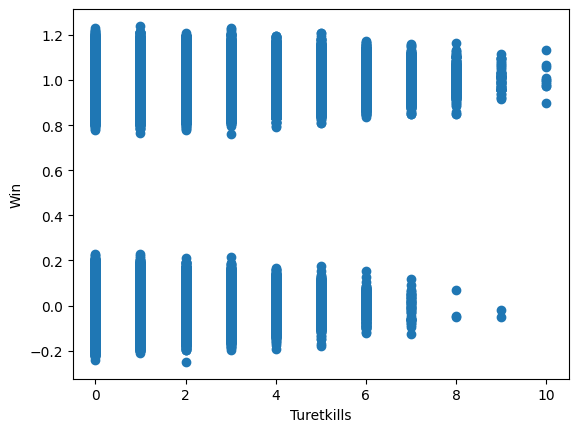

In [36]:
noise_level = 0.05

noise = np.random.normal(scale=noise_level, size=y.shape)

y_noisy = y + noise
plt.scatter(X, y_noisy)
plt.xlabel('Turetkills')
plt.ylabel('Win')
new_y = []
for i in range(11):
    new_y.append(
        len(X[(X['turretkills'] == i) & (X['win'] == 1)]) -
        len(X[(X['turretkills'] == i) & (X['win'] == 0)])
    )
# plt.scatter(X,regr.predict(X))

In [37]:
from scipy.stats import gaussian_kde
density = gaussian_kde(np.vstack([X, y]))
xgrid, ygrid = np.meshgrid(np.linspace(min(X), max(X), 100), np.linspace(min(y), max(y), 100))
zgrid = density(np.vstack([xgrid.ravel(), ygrid.ravel()]))

# Gráfico de contorno
plt.contourf(xgrid, ygrid, zgrid.reshape(xgrid.shape), cmap='Blues')
plt.scatter(X, y, color='red')
plt.title('Gráfico de Contorno da Densidade entre X e Y')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

ValueError: all the input array dimensions except for the concatenation axis must match exactly, but along dimension 1, the array at index 0 has size 1 and the array at index 1 has size 1834517

In [40]:
# X = df_merged2[['baronkills', 'dragonkills', 'harrykills']]
minha_lista = ['baronkills', 'dragonkills', 'harrykills', 'firstbaron', 'firstdragon', 'firstharry', 'inhibkills_x', 'towerkills', 'turretkills']

for coluna in minha_lista:
  filtered_data = df_merged2

  X = filtered_data[[coluna]] 
  y = filtered_data['win']

  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25) 

  regr = LogisticRegression() 
  regr.fit(X_train, y_train) 
  correlacao = X[coluna].corr(y)
  # print(np.corrcoef(X_train, y_train)[0][1])
  print(coluna)
  print(f'Score: {regr.score(X_test, y_test)}')
  print(f'Correlação: {correlacao}')

baronkills
Score: 0.6447986394261169
Correlação: 0.2776092839818755
dragonkills
Score: 0.6576150709722434
Correlação: 0.33105068168280455
harrykills
Score: 0.5658635501384558
Correlação: 0.15845581983332457
firstbaron
Score: 0.6348450820923184
Correlação: 0.2907139904082637
firstdragon
Score: 0.6158079497634259
Correlação: 0.22924941264302143
firstharry
Score: 0.5673026186686436
Correlação: 0.15890882688925823
inhibkills_x
Score: 0.772025379935896
Correlação: 0.4648679515971799
towerkills
Score: 0.7692148354883022
Correlação: 0.5427108407010098
turretkills
Score: 0.6974838104790354
Correlação: 0.4124277046872929


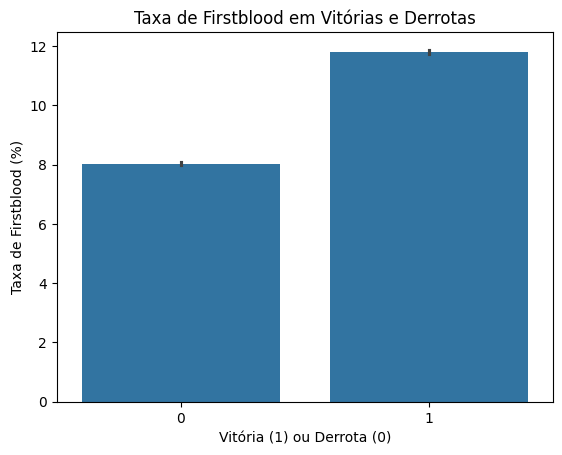

In [39]:
import seaborn as sns
import matplotlib.pyplot as plt

# Exemplo: Taxa de firstblood em vitórias e derrotas
sns.barplot(x='win', y='firstblood_y', data=df_merged2, estimator=lambda x: sum(x) / len(x) * 100)
plt.title('Taxa de Firstblood em Vitórias e Derrotas')
plt.xlabel('Vitória (1) ou Derrota (0)')
plt.ylabel('Taxa de Firstblood (%)')
plt.show()

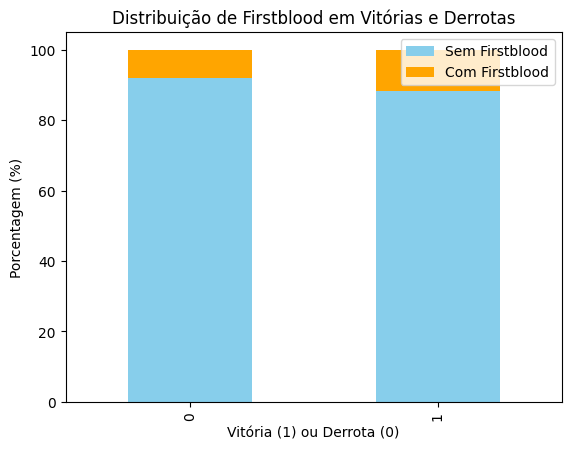

In [41]:
import seaborn as sns
import matplotlib.pyplot as plt

# Exemplo de dados
data = df_merged2.groupby('win')['firstblood_y'].value_counts(normalize=True).unstack() * 100

# Gráfico de barras empilhadas
data.plot(kind='bar', stacked=True, color=['skyblue', 'orange'])
plt.title('Distribuição de Firstblood em Vitórias e Derrotas')
plt.xlabel('Vitória (1) ou Derrota (0)')
plt.ylabel('Porcentagem (%)')
plt.legend(['Sem Firstblood', 'Com Firstblood'])
plt.show()

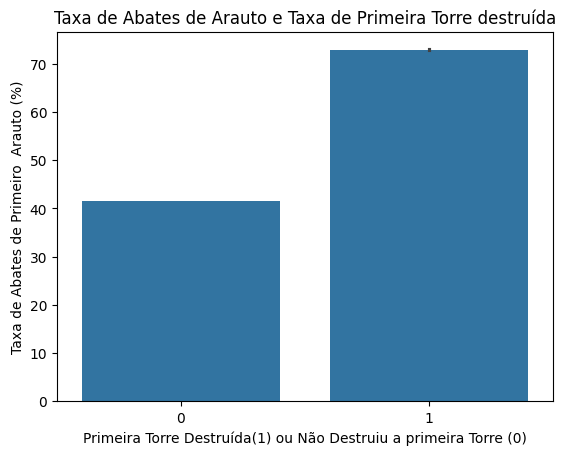

In [47]:
import seaborn as sns
import matplotlib.pyplot as plt

# Exemplo: Taxa de firstblood em vitórias e derrotas
sns.barplot(x='firstharry', y='firsttower', data=df_merged2, estimator=lambda x: sum(x) / len(x) * 100)
plt.title('Taxa de Abates de Arauto e Taxa de Primeira Torre destruída')
plt.xlabel('Primeira Torre Destruída(1) ou Não Destruiu a primeira Torre (0)')
plt.ylabel('Taxa de Abates de Primeiro  Arauto (%)')
plt.show()

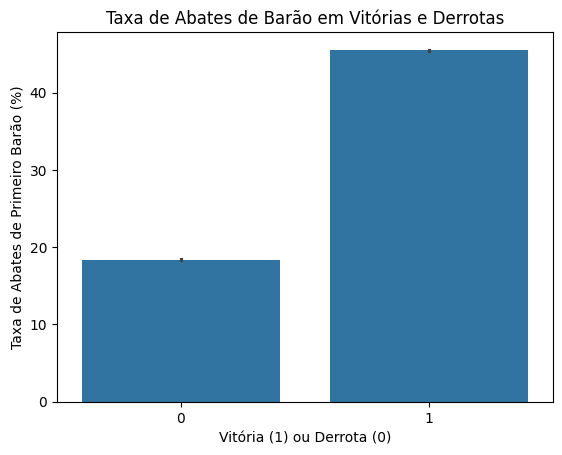

In [48]:
import seaborn as sns
import matplotlib.pyplot as plt

# Exemplo: Taxa de firstblood em vitórias e derrotas
sns.barplot(x='win', y='firstbaron', data=df_merged2, estimator=lambda x: sum(x) / len(x) * 100)
plt.title('Taxa de Abates de Barão em Vitórias e Derrotas')
plt.xlabel('Vitória (1) ou Derrota (0)')
plt.ylabel('Taxa de Abates de Primeiro Barão (%)')
plt.show()

In [45]:
# X = df_merged2[['baronkills', 'dragonkills', 'harrykills']]
minha_lista = ['firstharry']
for coluna in minha_lista:
  filtered_data = df_merged2

  X = filtered_data[[coluna]] 
  y = filtered_data['firsttower']

  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25) 

  regr = LogisticRegression() 
  regr.fit(X_train, y_train) 
  correlacao = X[coluna].corr(y)
  # print(np.corrcoef(X_train, y_train)[0][1])
  print(coluna)
  print(f'Score: {regr.score(X_test, y_test)}')
  print(f'Correlação: {correlacao}')

firstharry
Score: 0.617811743671369
Correlação: 0.26295921332584654
